In [12]:
import os
import sys
import csv
import logging
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..',))
sys.path.append(repo_root)

from src import *

In [13]:
# Process saved files
process_directory(os.getcwd(), 'ex01.1')
process_directory(os.getcwd(), 'ex01.2')
process_directory(os.getcwd(), 'ex01.3')

In [21]:

def group_results_df(averages_df, compared_col, binary=False):
    results = []

    for train_value, group in averages_df.groupby(['train']):
        base_values = group.iloc[0, :]
        values = calculate_column_means_against_base(group, compared_col)
        values['train'] = base_values['train']
        results.append(values)

    if binary:
        return pd.DataFrame(results)[['Spring_Rank', 'Page_Rank', 'Point_Wise', 'train']]
    else:
        return pd.DataFrame(results)

def plot_results(ax, df, title):
    train_size = df['train']
    colormap = plt.colormaps.get_cmap('plasma')
    colors = colormap(np.linspace(0, 1, len(df.columns) - 1))
    
    for i, column in enumerate(df.columns):
        if column != 'train':
            ax.plot(train_size, df[column], label=column, marker='s', color=colors[i-1])
    
    ax.set_xscale('log')
    ax.set_xlabel('Train Size')
    ax.set_ylabel('Mean')
    ax.set_title(title)
    ax.legend()

def visualize_results(base_path, compared_col, metric_type='mean', binary=False):
    # Read the summary CSV files
  
    log_likelihood_df = pd.read_csv(os.path.join(base_path,'log_likelihood_summary.csv'))
    leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path,'leadership_log_likelihood_summary.csv'))
    rms_df = pd.read_csv(os.path.join(base_path,'rms_summary.csv'))
    rho_df = pd.read_csv(os.path.join(base_path,'rho_summary.csv'))
    tau_df = pd.read_csv(os.path.join(base_path, 'tau_summary.csv'))

    # List of dataframes and their titles
    dataframes = [
        (log_likelihood_df, 'Log Likelihood'),
        (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
        (rms_df, 'RMS'),
        (rho_df, 'Rho'),
        (tau_df, 'Tau')
    ]

    fig, axes = plt.subplots(1, 5, figsize=(50, 10), sharey=True)
    axes = axes.flatten()

    for i, (df, title) in enumerate(dataframes):
        grouped_df = group_results_df(df, compared_col, title, binary, metric_type)
        plot_results(axes[i], grouped_df, metric_type, title)

    plt.tight_layout()
    plt.show()


# Standard 

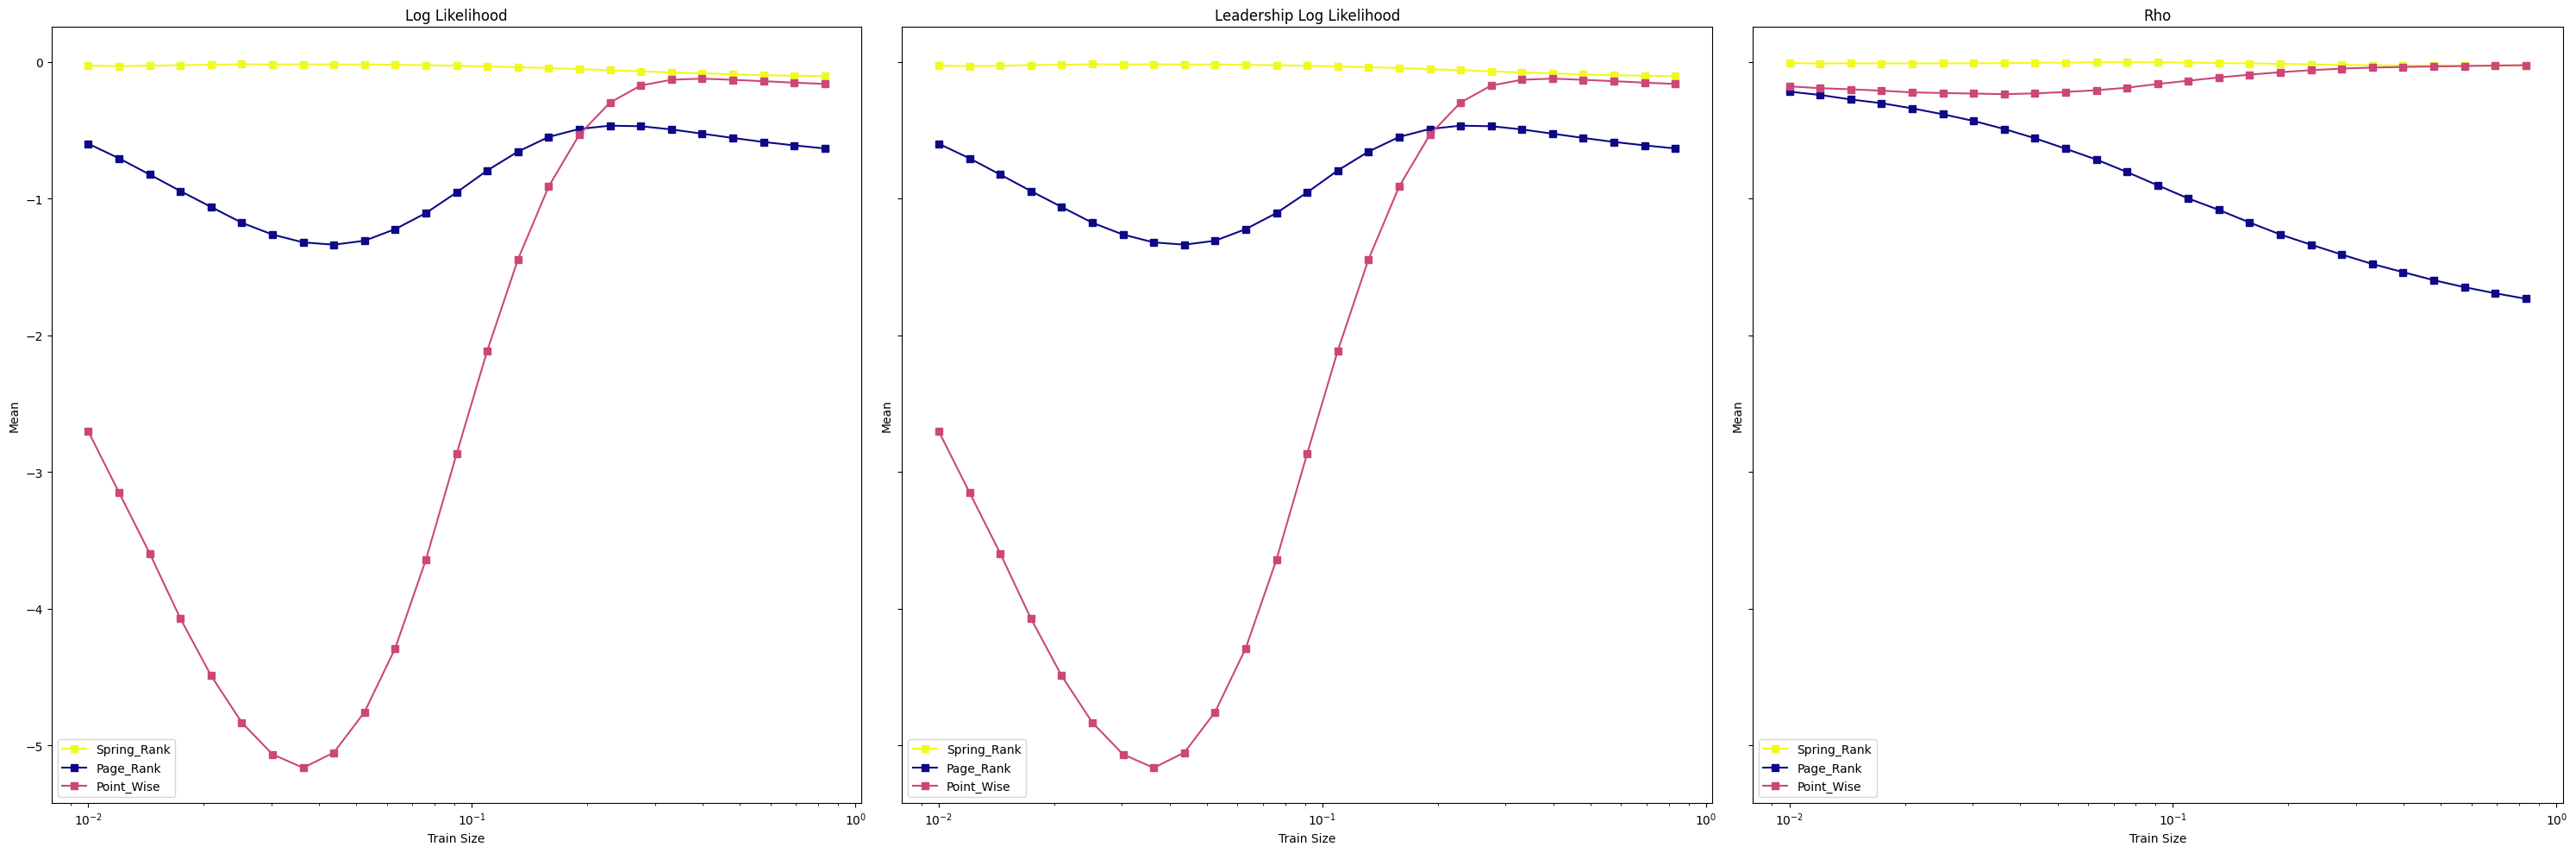

In [23]:
base_path = os.path.join(os.getcwd(), 'results', 'ex01.1')
log_likelihood_df = pd.read_csv(os.path.join(base_path,'log_likelihood_summary.csv'))
leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path,'leadership_log_likelihood_summary.csv'))
rho_df = pd.read_csv(os.path.join(base_path,'rho_summary.csv'))
    

# List of dataframes and their titles
dataframes = [
    (log_likelihood_df, 'Log Likelihood'),
    (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
    (rho_df, 'Rho'),
]

fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
axes = axes.flatten()

for i, (df, title) in enumerate(dataframes):
    grouped_df = group_results_df(df, 'BT', binary=True)
    plot_results(axes[i], grouped_df, title)

plt.tight_layout()
plt.show()



# Higher Order 

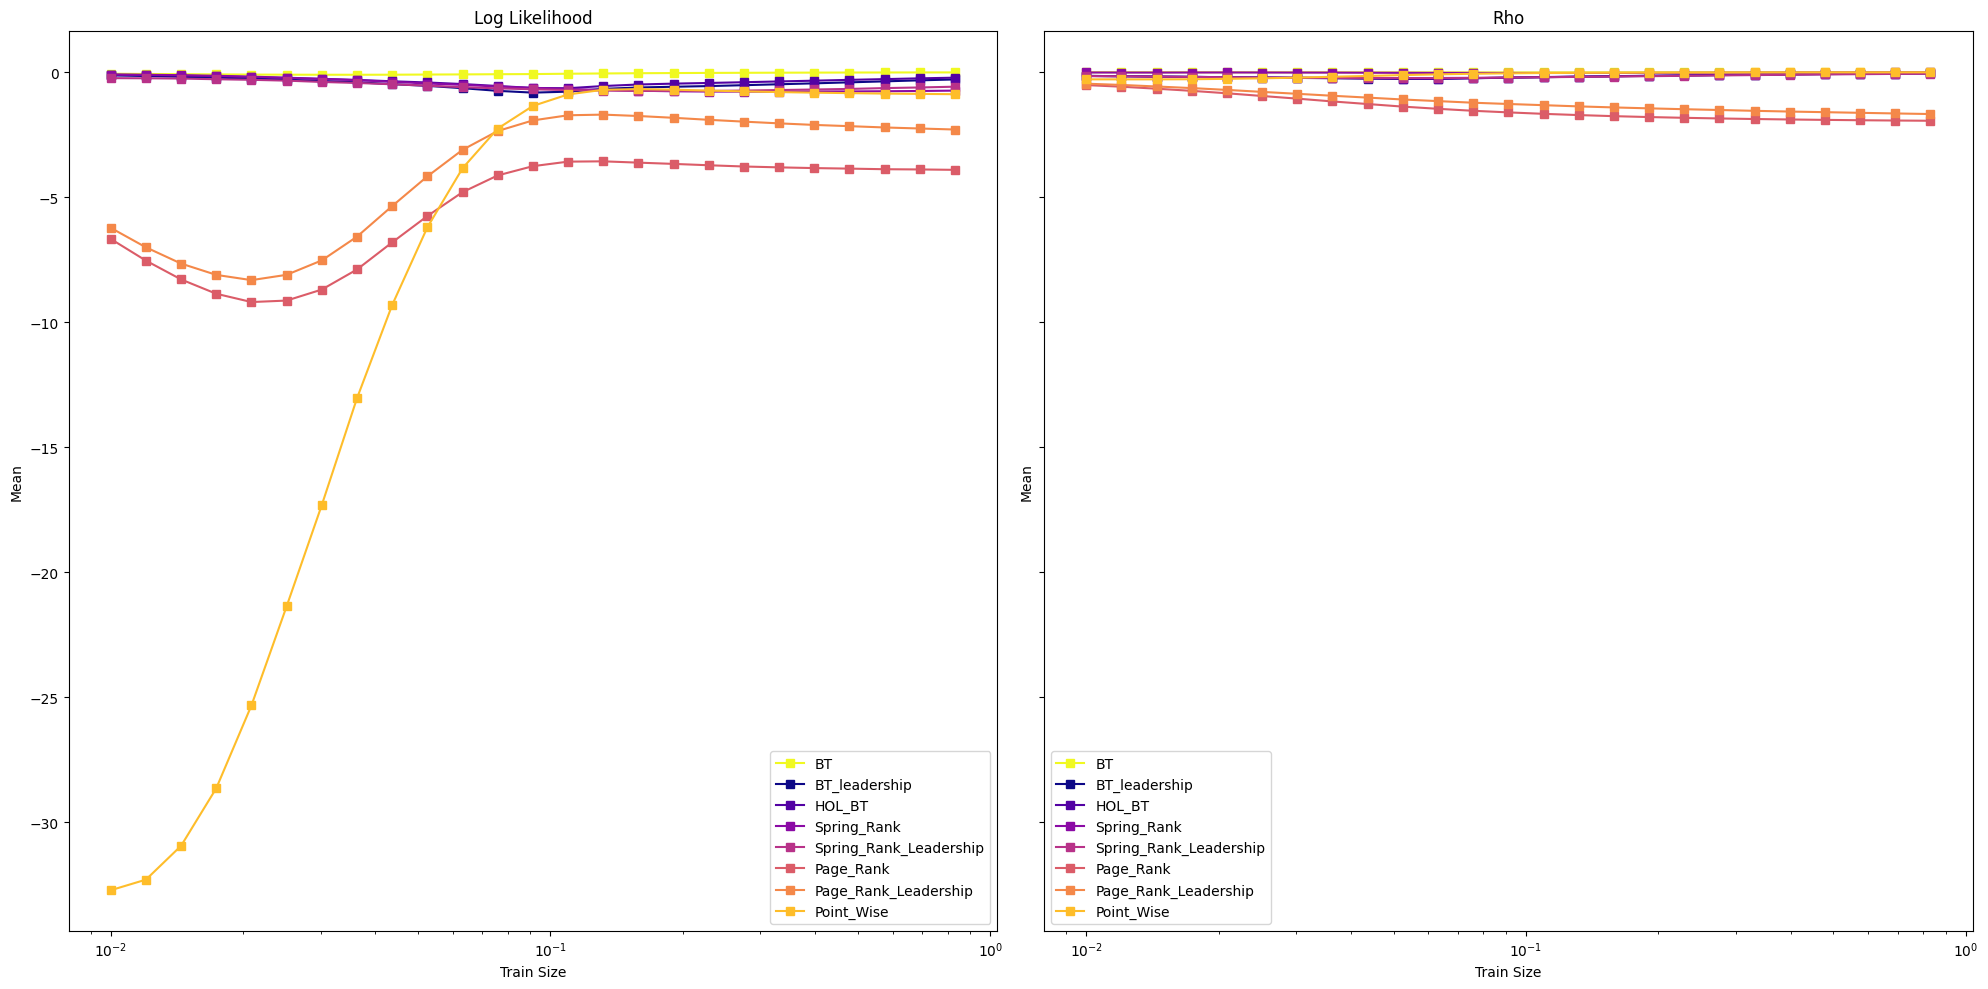

In [25]:
base_path = os.path.join(os.getcwd(), 'results', 'ex01.2')
log_likelihood_df = pd.read_csv(os.path.join(base_path,'log_likelihood_summary.csv'))
rho_df = pd.read_csv(os.path.join(base_path,'rho_summary.csv'))
    

# List of dataframes and their titles
dataframes = [
    (log_likelihood_df, 'Log Likelihood'),
    (rho_df, 'Rho'),
]

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
axes = axes.flatten()

for i, (df, title) in enumerate(dataframes):
    grouped_df = group_results_df(df, 'HO_BT')
    plot_results(axes[i], grouped_df, title)

plt.tight_layout()
plt.show()




# Higher Order Leadership

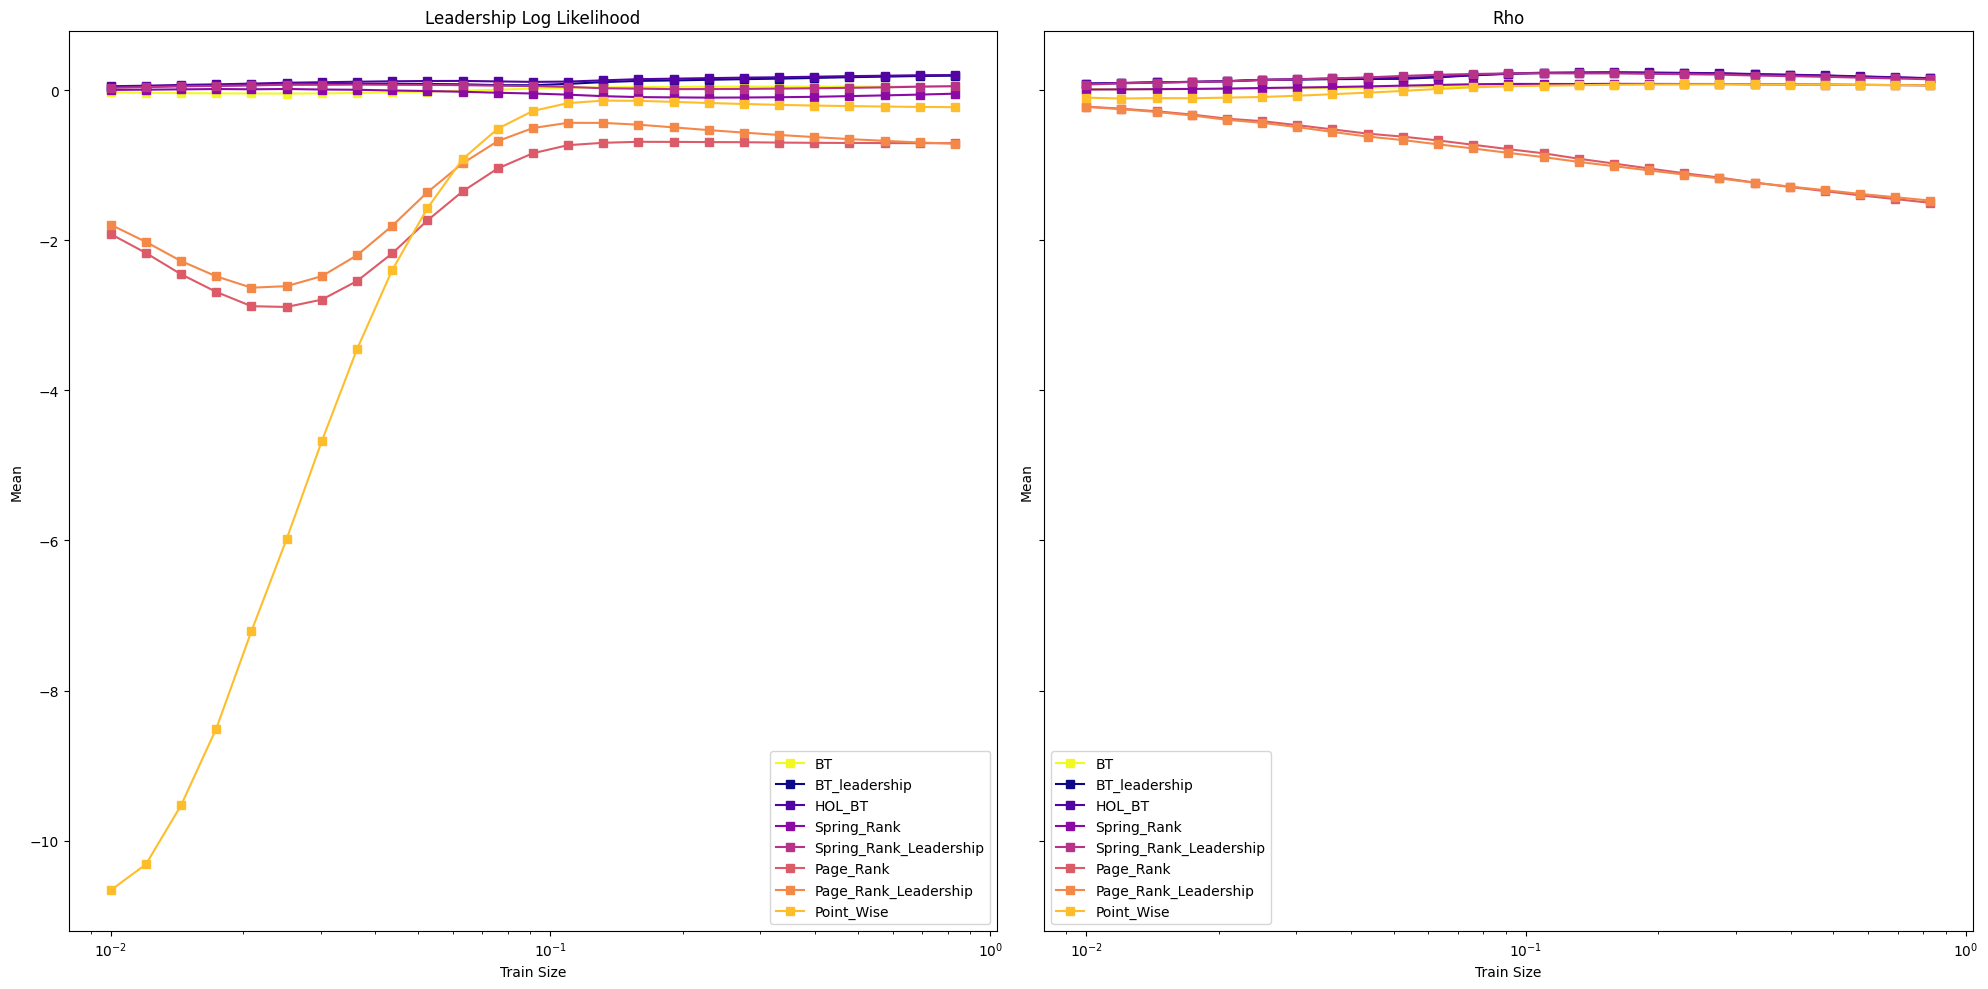

In [26]:
base_path = os.path.join(os.getcwd(), 'results', 'ex01.3')
leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path,'leadership_log_likelihood_summary.csv'))
rho_df = pd.read_csv(os.path.join(base_path,'rho_summary.csv'))
    

# List of dataframes and their titles
dataframes = [
    (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
    (rho_df, 'Rho'),
]

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
axes = axes.flatten()

for i, (df, title) in enumerate(dataframes):
    grouped_df = group_results_df(df, 'HO_BT')
    plot_results(axes[i], grouped_df, title)

plt.tight_layout()
plt.show()
